# WITH PANDAS AND MATPLOTLIB

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [3]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


## 1: Plot number of people by gender

In [4]:
kill[kill["gender"]=="M"].head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


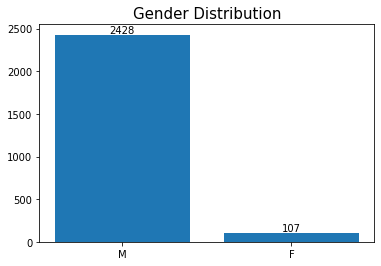

In [5]:
# with matplotlib
#1st solution
index=kill["gender"].value_counts().index
values=kill["gender"].value_counts().values

fig, ax = plt.subplots()
bars = ax.bar(index,values)

ax.bar_label(bars)
plt.title("Gender Distribution", size=15)
plt.show()

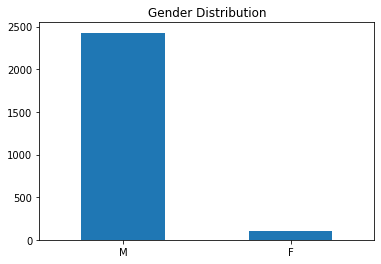

In [12]:
#2nd solution
kill["gender"].value_counts().plot.bar(rot=0)
plt.title("Gender Distribution")
plt.show()

## 2: Plot 7 most common kill weapons

In [27]:
kill["armed"].value_counts().head(7)

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

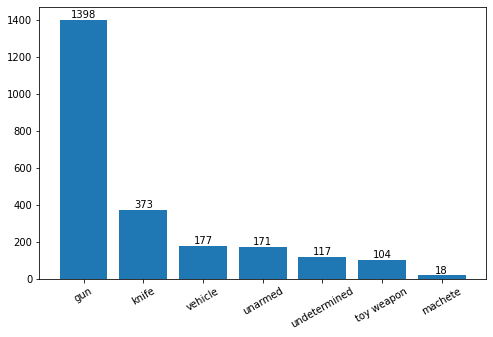

In [56]:
# with matplotlib
index=kill["armed"].value_counts().head(7).index
values=kill["armed"].value_counts().head(7).values

fig,ax=plt.subplots(figsize=(8,5))
bars=ax.bar(index,values)
ax.bar_label(bars)
plt.xticks(rotation=30)

plt.show()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [44]:
index_above25=kill[kill["age"]>25].index

kill.loc[index_above25, 'age_cat'] = "above25"
kill["age_cat"].fillna("below25",inplace=True)

In [81]:
kill["age_cat"].value_counts()

above25    1737
below25     517
Name: age_cat, dtype: int64

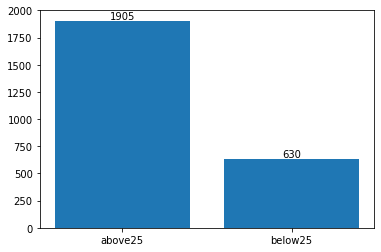

In [53]:
index=kill["age_cat"].value_counts().index
values=kill["age_cat"].value_counts().values

fig,ax=plt.subplots(figsize=(6,4))
bars=ax.bar(index,values)
ax.bar_label(bars)
plt.xticks(rotation=0)

plt.show()

## 4: Plot number of killed poeple by race

In [59]:
kill["race"].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5, 1.0, 'Race of killed people')

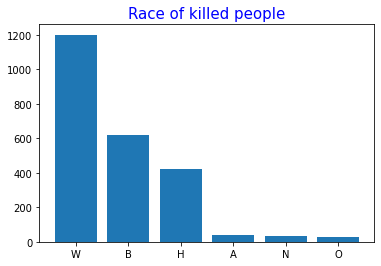

In [63]:
# with matplotlib
#1st solution
index=kill["race"].value_counts().index
value=kill["race"].value_counts().values

fig, ax=plt.subplots()
ax.bar(index,value)
plt.title("Race of killed people", color="b", size=15)


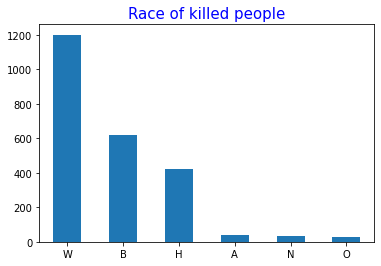

In [69]:
#2nd solution
kill["race"].value_counts().plot.bar()
plt.title("Race of killed people", color="b", size=15)
plt.xticks(rotation=0)
plt.show()


## 5: Killed People According to Races (Pie Chart)

In [71]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [73]:
kill["race"].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [75]:
kill["race"].value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [78]:
kill.dropna(how="any",inplace=True)

In [79]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [82]:
kill["race"].value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [84]:
kill["race"].unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [86]:
kill["race"].value_counts().values

array([1168,  592,  401,   36,   29,   28])

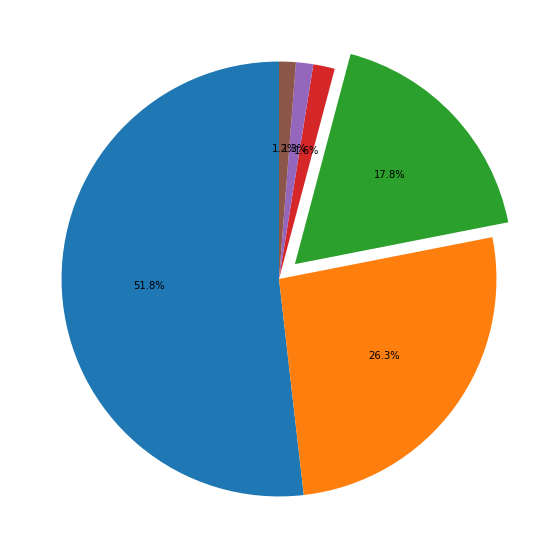

In [119]:
# matplotlib
plt.figure(figsize=(12, 10))
plt.pie(kill["race"].value_counts(), labeldistance=0.7, autopct="%.1f%%", explode=[0,0,0.1,0,0,0], startangle=90)  
plt.show() 
